# DL HW1 Jayadeep

#### Unit norm ball

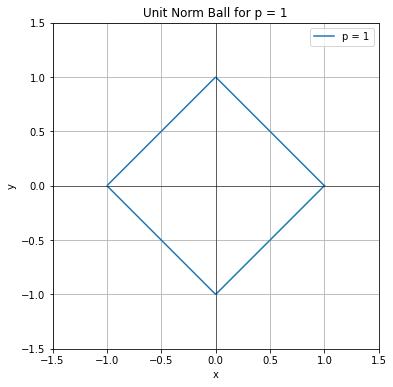

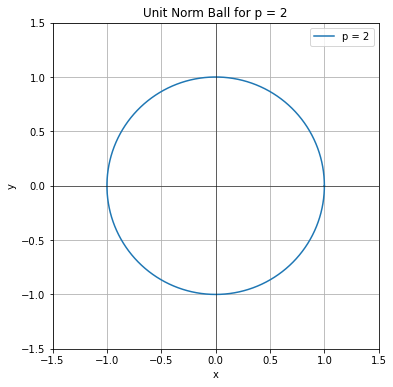

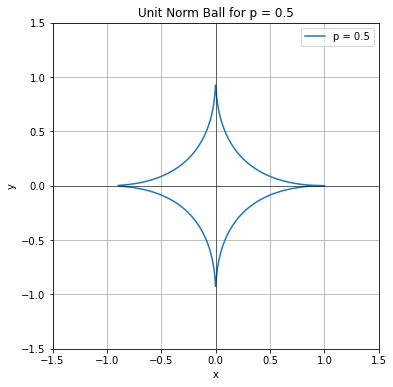

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_unit_norm_ball(p):
    num_points = 1000
    theta = np.linspace(0, 2 * np.pi, num_points)
    
    x = np.cos(theta)
    y = np.sin(theta)
    
    norm = (np.abs(x)**p + np.abs(y)**p)**(1/p)
    
    x_norm = x / norm
    y_norm = y / norm
    
    plt.figure(figsize=(6, 6))
    plt.plot(x_norm, y_norm, label=f'p = {p}')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title(f'Unit Norm Ball for p = {p}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_unit_norm_ball(1)
plot_unit_norm_ball(2)
plot_unit_norm_ball(0.5)


In [2]:
print("Observations:")
print("1. For integer p ≥ 1 (e.g., p = 1 or p = 2), the unit norm ball is convex.")
print("2. For 0 < p < 1, the unit norm ball is not convex and shows a star-like or rhombus shape.")


Observations:
1. For integer p ≥ 1 (e.g., p = 1 or p = 2), the unit norm ball is convex.
2. For 0 < p < 1, the unit norm ball is not convex and shows a star-like or rhombus shape.


#### Incomplete space

In [3]:
from scipy.integrate import quad

In [4]:
def f_n(x,n):
    if x<=1/n:
        return n*x
    else:
        return 1
def limit_function(x):
    return 1 if x>0 else 0
def l1_norm(f_n,limit_function,n):
    integrand= lambda x: np.abs(f_n(x,n) - limit_function(x))
    integral,_ = quad(integrand,0,1)
    return integral


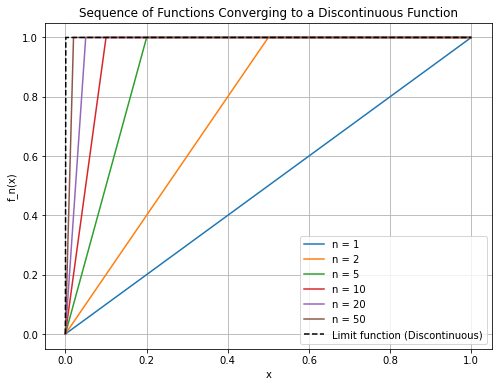

In [5]:
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(8, 6))
for n in [1, 2, 5, 10, 20, 50]:
    y_n = [f_n(xi, n) for xi in x]
    plt.plot(x, y_n, label=f'n = {n}')
    
y_limit = [limit_function(xi) for xi in x]
plt.plot(x, y_limit, 'k--', label='Limit function (Discontinuous)')
plt.xlabel('x')
plt.ylabel('f_n(x)')
plt.title('Sequence of Functions Converging to a Discontinuous Function')
plt.legend()
plt.grid(True)
plt.show()


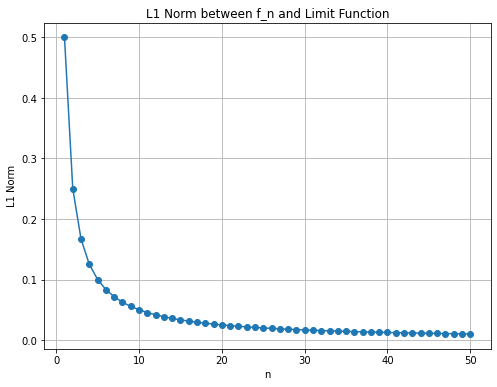

In [6]:
n_values = np.arange(1, 51)
l1_norms = [l1_norm(f_n, limit_function, n) for n in n_values]

plt.figure(figsize=(8, 6))
plt.plot(n_values, l1_norms, marker='o')
plt.xlabel('n')
plt.ylabel('L1 Norm')
plt.title('L1 Norm between f_n and Limit Function')
plt.grid(True)
plt.show()


#### Entropy

In [7]:
def entropy(pmf):
    pmf = np.array(pmf)
    pmf = pmf[pmf > 0]
    return -np.sum(pmf * np.log2(pmf))


In [8]:
pmf = [0.2, 0.3, 0.5]
entropy_value = entropy(pmf)
print(f"Entropy in bits: {entropy_value}")


Entropy in bits: 1.4854752972273344


In [9]:
pmf = [0.5, 0.5, 0.0,0.4]
entropy_value = entropy(pmf)
print(f"Entropy : {entropy_value}")

Entropy : 1.528771237954945


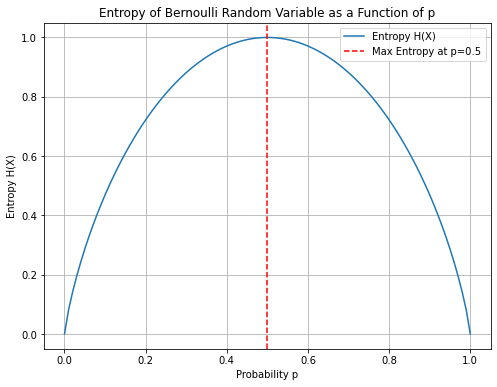

In [10]:
def bernoulli_entropy(p):
    return entropy([p, 1 - p])

p_values = np.linspace(0, 1, 100)
entropies = [bernoulli_entropy(p) for p in p_values]

plt.figure(figsize=(8, 6))
plt.plot(p_values, entropies, label='Entropy H(X)')
plt.xlabel('Probability p')
plt.ylabel('Entropy H(X)')
plt.title('Entropy of Bernoulli Random Variable as a Function of p')
plt.axvline(x=0.5, color='red', linestyle='--', label='Max Entropy at p=0.5')
plt.legend()
plt.grid(True)
plt.show()


#### Image entropy

In [11]:
from skimage import io
def normalized_histogram(image):
    hist, _ = np.histogram(image,bins=256,range=(0,255))
    hist_normalized = hist/hist.sum()
    return hist_normalized


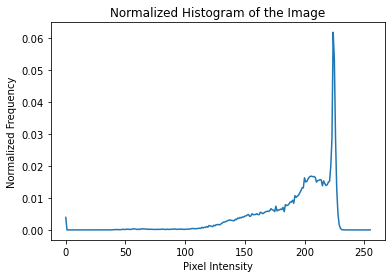

In [12]:
image_path = r"C:\Users\User\Downloads\5.1.11.tiff"
image = io.imread(image_path, as_gray=True)

hist = normalized_histogram(image)
plt.plot(hist)
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of the Image')
plt.show()

In [13]:
def image_entropy(image):
    hist_normalized = normalized_histogram(image)
    return entropy(hist_normalized)
entropy_value = image_entropy(image)
print(f"Entropy of the image: {entropy_value}")

Entropy of the image: 6.452275232463875


Entropy of 5.1.14.tiff: 7.3424325128940096
Entropy of 5.3.01.tiff: 7.523736852074143
Entropy of 5.2.08.tiff: 7.201007959852423


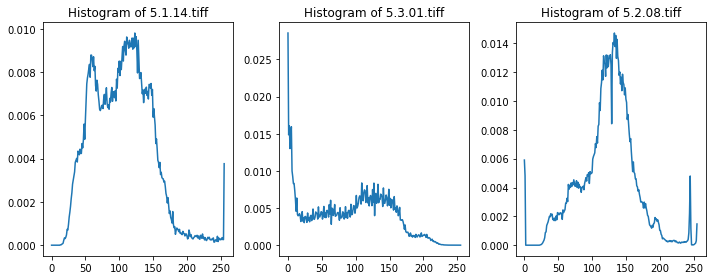

In [14]:
image1 = io.imread(r'C:\Users\User\Downloads\5.1.14.tiff', as_gray=True)
image2 = io.imread(r'C:\Users\User\Downloads\5.3.01.tiff', as_gray=True)
image3 = io.imread(r'C:\Users\User\Downloads\5.2.08.tiff', as_gray=True)

entropy_image1 = image_entropy(image1)
entropy_image2 = image_entropy(image2)
entropy_image3 = image_entropy(image3)

print(f"Entropy of 5.1.14.tiff: {entropy_image1}")
print(f"Entropy of 5.3.01.tiff: {entropy_image2}")
print(f"Entropy of 5.2.08.tiff: {entropy_image3}")

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
hist1 = normalized_histogram(image1)
plt.plot(hist1)
plt.title('Histogram of 5.1.14.tiff')

plt.subplot(1, 3, 2)
hist2 = normalized_histogram(image2)
plt.plot(hist2)
plt.title('Histogram of 5.3.01.tiff')

plt.subplot(1, 3, 3)
hist3 = normalized_histogram(image3)
plt.plot(hist3)
plt.title('Histogram of 5.2.08.tiff')

plt.tight_layout()
plt.show()

#### Normalized joint Histogram

In [15]:
def normalized_joint_histogram(image1, image2):
    image1_flat = image1.flatten()
    image2_flat = image2.flatten()
    joint_hist, x_edges, y_edges = np.histogram2d(image1_flat, image2_flat, bins=256, range=[[0, 255], [0, 255]])
    joint_hist_normalized = joint_hist / joint_hist.sum()
    return joint_hist_normalized


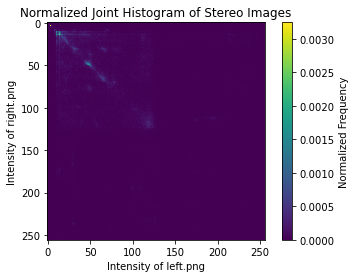

In [16]:
image_left = io.imread(r"C:\Users\User\Downloads\left.png", as_gray=True)
image_right = io.imread(r"C:\Users\User\Downloads\right.png", as_gray=True)
joint_hist_normalized = normalized_joint_histogram(image_left, image_right)
plt.imshow(joint_hist_normalized, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Normalized Frequency')
plt.xlabel('Intensity of left.png')
plt.ylabel('Intensity of right.png')
plt.title('Normalized Joint Histogram of Stereo Images')
plt.show()


#### Joint Entropy

In [17]:
def joint_entropy(joint_pmf):
    joint_pmf = joint_pmf.flatten()
    joint_pmf = joint_pmf[joint_pmf > 0]
    return -np.sum(joint_pmf * np.log2(joint_pmf))


#### Joint entropy using normalized joint Histogram

In [18]:
joint_entropy_value = joint_entropy(joint_hist_normalized)
print(f"Joint Entropy of the stereo image pair: {joint_entropy_value}")

Joint Entropy of the stereo image pair: 13.675203263382308


#### Conditional PMF

In [19]:
def conditional_pmf(joint_pmf, conditioning_index, conditioning_value):
    if conditioning_index == 0:
        conditional_pmf = joint_pmf[conditioning_value, :] / joint_pmf[conditioning_value, :].sum()
    elif conditioning_index == 1:
        conditional_pmf = joint_pmf[:, conditioning_value] / joint_pmf[:, conditioning_value].sum()
    else:
        raise ValueError("Invalid conditioning index. Must be 0 or 1.")
    return conditional_pmf

#### Conditional Entropy

In [20]:
def conditional_entropy(joint_pmf, conditioning_index):
    entropy = 0.0
    if conditioning_index == 0:
        for i in range(joint_pmf.shape[0]):
            p_cond = joint_pmf[i, :].sum()
            if p_cond > 0:
                cond_pmf = joint_pmf[i, :] / p_cond
                cond_pmf = cond_pmf[cond_pmf > 0]
                entropy += p_cond * (-np.sum(cond_pmf * np.log2(cond_pmf)))
    elif conditioning_index == 1:
        for i in range(joint_pmf.shape[1]):
            p_cond = joint_pmf[:, i].sum()
            if p_cond > 0:
                cond_pmf = joint_pmf[:, i] / p_cond
                cond_pmf = cond_pmf[cond_pmf > 0]
                entropy += p_cond * (-np.sum(cond_pmf * np.log2(cond_pmf)))
    else:
        raise ValueError("Invalid conditioning index. Must be 0 or 1.")
    return entropy

In [21]:
joint_hist_normalized = normalized_joint_histogram(image_left, image_right)

conditional_entropy_value_0 = conditional_entropy(joint_hist_normalized, 0)
print(f"Conditional Entropy given the first variable: {conditional_entropy_value_0}")

conditional_entropy_value_1 = conditional_entropy(joint_hist_normalized, 1)
print(f"Conditional Entropy given the second variable: {conditional_entropy_value_1}")

Conditional Entropy given the first variable: 6.416909158632363
Conditional Entropy given the second variable: 6.396577731686181


#### kl divergence

In [22]:
def kl_divergence(p,q):
    p=np.array(p)
    q=np.array(q)
    epsilon = 1e-10
    p_safe = np.where(p > 0, p, epsilon)
    q_safe = np.where(q > 0, q, epsilon)
    return np.sum(p_safe * np.log(p_safe / q_safe))

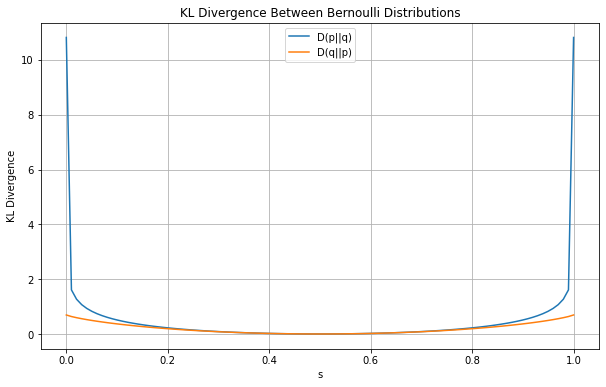

In [23]:

r = 0.5 
s_values = np.linspace(0, 1, 100)
kl_pq = [kl_divergence([r, 1 - r], [s, 1 - s]) for s in s_values]
kl_qp = [kl_divergence([s, 1 - s], [r, 1 - r]) for s in s_values]

plt.figure(figsize=(10, 6))
plt.plot(s_values, kl_pq, label='D(p||q)')
plt.plot(s_values, kl_qp, label='D(q||p)')
plt.xlabel('s')
plt.ylabel('KL Divergence')
plt.title('KL Divergence Between Bernoulli Distributions')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
assert all(d >= 0 for d in kl_pq), "D(p||q) is negative"
assert all(d >= 0 for d in kl_qp), "D(q||p) is negative"

print("D(p||q) and D(q||p) are non-negative.")


D(p||q) and D(q||p) are non-negative.


In [25]:
r_values = np.linspace(0.01, 0.99, 50)
for r in r_values:
    s = r
    assert np.isclose(kl_divergence([r, 1-r], [s, 1-s]), 0), "D(p||q) should be zero when r = s"
    assert np.isclose(kl_divergence([s, 1-s], [r, 1-r]), 0), "D(q||p) should be zero when r = s"

print("D(p||q) and D(q||p) are non-negative, and they are zero only when r = s.")

D(p||q) and D(q||p) are non-negative, and they are zero only when r = s.


In [26]:
hist_left = normalized_histogram(image_left)
hist_right = normalized_histogram(image_right)


kl_pq = kl_divergence(hist_left, hist_right)
kl_qp = kl_divergence(hist_right, hist_left)

print(f"KL Divergence D(p||q): {kl_pq}")
print(f"KL Divergence D(q||p): {kl_qp}")

print("Evaluating KL divergence as a metric for image similarity:")

if kl_pq == 0 and kl_qp == 0:
    print("The KL divergences are zero, indicating that the images are identical in terms of their histograms.")
elif kl_pq > 0 and kl_qp > 0:
    print("The KL divergences are positive, indicating that the images have some differences in their histograms.")
else:
    print("KL divergence between the histograms of the images may not always perfectly reflect visual similarity.")

KL Divergence D(p||q): 0.010469305576929294
KL Divergence D(q||p): 0.009988102422862296
Evaluating KL divergence as a metric for image similarity:
The KL divergences are positive, indicating that the images have some differences in their histograms.


# HW2

In [27]:
def cross_entropy(p, q):
    H_p = entropy(p)   # Reuse the entropy function
    D_pq = kl_divergence(p, q)  # Reuse the KL divergence function
    return H_p + D_pq


In [28]:
cross_entropy_value = cross_entropy(hist_left, hist_right)
print(f"Cross Entropy between the stereo images: {cross_entropy_value}")


Cross Entropy between the stereo images: 7.268763410326868


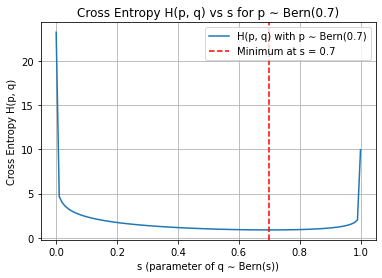

In [29]:
# Cross-entropy between two Bernoulli distributions
def cross_entropy_bernoulli(r, s):
    epsilon = 1e-10  # Small value to avoid log(0)
    s = np.clip(s, epsilon, 1 - epsilon)  # Ensure s is in (0, 1)
    return -r * np.log2(s) - (1 - r) * np.log2(1 - s)

# Fixed r (for Bernoulli distribution p)
r = 0.7  # Example value for p ∼ Bern(r)

# Values of s (for Bernoulli distribution q) to vary
s_values = np.linspace(0, 1, 100)

# Compute cross-entropy for each value of s
cross_entropy_values = [cross_entropy_bernoulli(r, s) for s in s_values]

# Plotting
plt.plot(s_values, cross_entropy_values, label=f'H(p, q) with p ∼ Bern({r})')
plt.xlabel('s (parameter of q ∼ Bern(s))')
plt.ylabel('Cross Entropy H(p, q)')
plt.title(f'Cross Entropy H(p, q) vs s for p ∼ Bern({r})')
plt.axvline(r, color='red', linestyle='--', label=f'Minimum at s = {r}')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# JS divergence function
def js_divergence(p, q):
    m = 0.5 * (np.array(p) + np.array(q))  # Average distribution
    return 0.5 * (kl_divergence(p, m) + kl_divergence(q, m))

# Verify symmetry using stereo image histograms
js_value = js_divergence(hist_left, hist_right)
js_reverse = js_divergence(hist_right, hist_left)
print(f"JS Divergence between stereo image pair: {js_value}")
print(f"JS Divergence (reversed): {js_reverse}")  

assert np.isclose(js_value, js_reverse), "JS divergence is not symmetric"


JS Divergence between stereo image pair: 0.002545957160185125
JS Divergence (reversed): 0.002545957160185125


In [31]:
def check_joint_histogram(p_XY, r_X, s_Y):
    computed_r_X = p_XY.sum(axis=1)
    computed_s_Y = p_XY.sum(axis=0)
    
    r_X_match = np.allclose(computed_r_X, r_X)
    s_Y_match = np.allclose(computed_s_Y, s_Y)
    
    return r_X_match and s_Y_match

r_X = np.array([0.2, 0.3, 0.5])
s_Y = np.array([0.4, 0.6])
p_XY_positive = np.array([[0.08, 0.12], 
                          [0.12, 0.18], 
                          [0.2, 0.3]])
p_XY_negative = np.array([[0.1, 0.1], 
                          [0.2, 0.2], 
                          [0.3, 0.3]])

print("Positive Example: ", check_joint_histogram(p_XY_positive, r_X, s_Y))
print("Negative Example: ", check_joint_histogram(p_XY_negative, r_X, s_Y))


Positive Example:  True
Negative Example:  False


####  Generate two clusters of points from a 10-dimensional MVG distribution

In [32]:
def generate_data():
    np.random.seed(42)  # For reproducibility
    mu1 = np.ones(10)  # Cluster 1 center at [1,1,...,1]
    mu2 = 10 * np.ones(10)  # Cluster 2 center at [10,10,...,10]
    cov = 0.01 * np.eye(10)  # Covariance matrix for both clusters

    # Generate 10 points for each cluster
    cluster1 = np.random.multivariate_normal(mu1, cov, 10)
    cluster2 = np.random.multivariate_normal(mu2, cov, 10)

    # Combine into a single dataset
    X = np.vstack([cluster1, cluster2])
    return X



In [33]:
# Step 2: Compute pairwise affinities in high-dimensional space
def compute_high_dimensional_affinities(X, sigma):
    n = X.shape[0]
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                diff = X[i] - X[j]
                P[i, j] = np.exp(-np.sum(diff**2) / (2 * sigma[i]**2))
        P[i] /= np.sum(P[i])  # Normalize rows
    return P



In [34]:
def initialize_low_dimensional_points(n, dim=2):
    return np.random.randn(n, dim) * 1e-1  # Larger random values for better separation



In [35]:
# Step 4: Compute pairwise affinities in low-dimensional space using t-distribution
def compute_low_dimensional_affinities(Y):
    n = Y.shape[0]
    Q = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                diff = Y[i] - Y[j]
                Q[i, j] = (1 + np.sum(diff**2)) ** -1  # t-distribution
        Q[i] /= np.sum(Q[i])  # Normalize rows
    return Q



In [36]:
def kl_divergence(P, Q):
    Q = Q + 1e-8  # To avoid division by zero
    mask = P > 0  # Ignore zero entries of P
    return np.sum(P[mask] * np.log(P[mask] / Q[mask]))



In [37]:
# Step 6: Gradient descent update
def gradient_descent(Y, P, Q, eta):
    n, dim = Y.shape
    grad = np.zeros_like(Y)
    for i in range(n):
        for j in range(n):
            if i != j:
                diff = Y[i] - Y[j]
                grad[i] += 4 * (P[i, j] - Q[i, j]) * diff / (1 + np.sum(diff**2))
    return Y - eta * grad



#### t-sne

In [38]:
# Main t-SNE algorithm
def tsne(X, sigma, eta, T=50, dim=2):
    P = compute_high_dimensional_affinities(X, sigma)
    Y = initialize_low_dimensional_points(X.shape[0], dim)
    
    # Compute initial KL divergence
    Q = compute_low_dimensional_affinities(Y)
    kl_initial = kl_divergence(P, Q)
    
    # Plot initial embedding
    plt.figure(figsize=(8, 6))
    plt.scatter(Y[:, 0], Y[:, 1], c='r', label='Initial')
    plt.title('Initial Low-dimensional Embedding')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Iterative updates
    for t in range(T):
        Q = compute_low_dimensional_affinities(Y)
        Y = gradient_descent(Y, P, Q, eta)
        if t % 10 == 0:  # Plot every 10 iterations
            plt.figure(figsize=(8, 6))
            plt.scatter(Y[:, 0], Y[:, 1], c='b', label=f'Iteration {t}')
            plt.title(f'Low-dimensional Embedding at Iteration {t}')
            plt.xlabel('Dimension 1')
            plt.ylabel('Dimension 2')
            plt.legend()
            plt.grid(True)
            plt.show()
    
    # Compute final KL divergence
    Q = compute_low_dimensional_affinities(Y)  # Ensure this is computed after the loop
    kl_final = kl_divergence(P, Q)
    
    return Y, kl_initial, kl_final



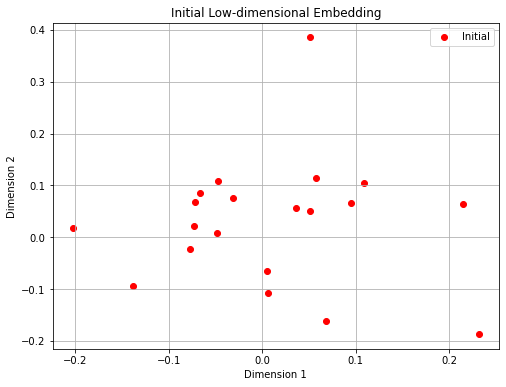

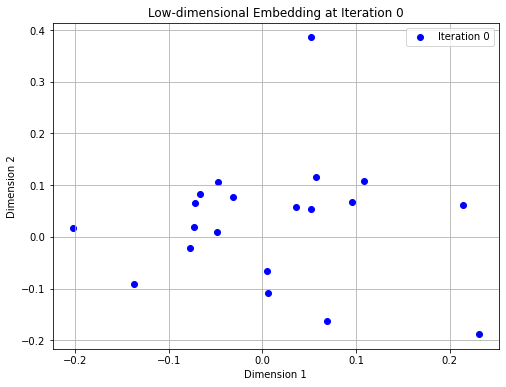

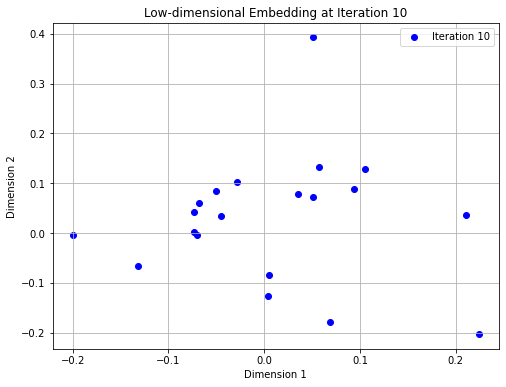

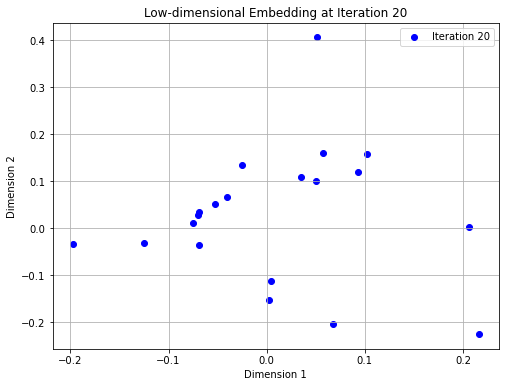

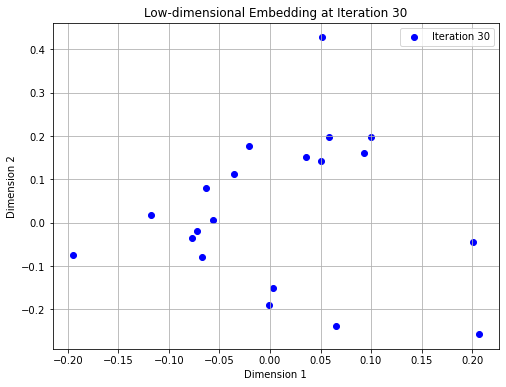

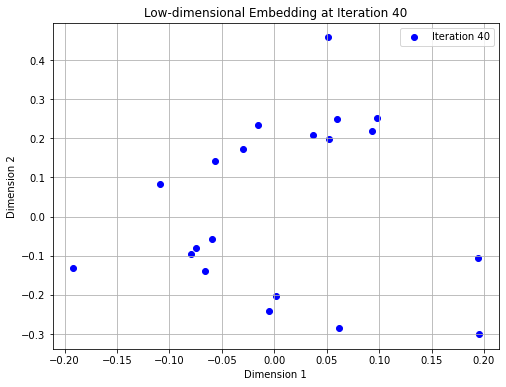

KL Divergence at the beginning: 15.072630263664847
KL Divergence at the end: 12.933227102930147


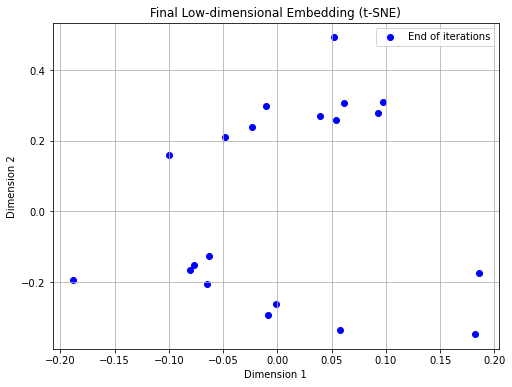

In [39]:
X = generate_data()
sigma = np.ones(X.shape[0]) * 0.5  # Use fixed sigma for simplicity
eta = 0.01  # Learning rate
T = 50  # Number of iterations

# Run t-SNE
Y, kl_initial, kl_final = tsne(X, sigma, eta, T)

# Print final KL divergence
print(f"KL Divergence at the beginning: {kl_initial}")
print(f"KL Divergence at the end: {kl_final}")

# Plot final embedding
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], c='b', label='End of iterations')
plt.title('Final Low-dimensional Embedding (t-SNE)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()


#### Default t-sne with different perplexity values

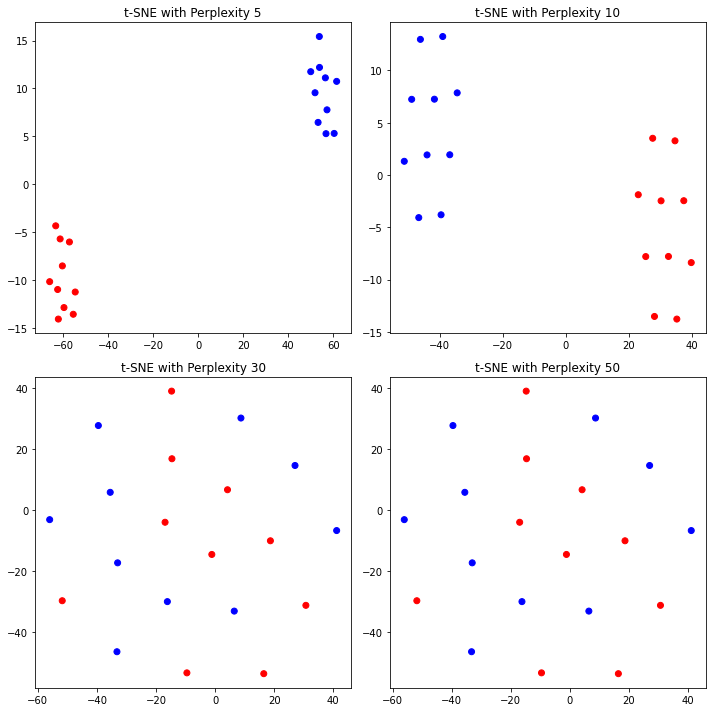

In [40]:
from sklearn.manifold import TSNE

# Generate data again
X = generate_data()

# Test with different perplexity values
perplexities = [5, 10, 30, 50]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, random_state=42,
                init='random', learning_rate=50.0)  # Explicitly set 'random' init and learning_rate=200.0
    Y = tsne.fit_transform(X)
    
    ax = axs[i//2, i%2]
    ax.scatter(Y[:, 0], Y[:, 1], c=['r']*10 + ['b']*10)
    ax.set_title(f't-SNE with Perplexity {perplexity}')

plt.tight_layout()
plt.show()


Low perplexity- tight clusters
high perplexity- seperate